In [2]:
# Alla diverse paket som har används vid något tillfälle under inlämningens gång
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as scs
import seaborn as sns
from scipy.stats import t
import scipy.stats as stats
from scipy.stats import f
from scipy.stats import norm

In [3]:
df = pd.read_csv("../Statistik/Files/cars.csv") # laddar in datasetet

In [4]:
unique_cylinders = df["cylinders"].unique() # Kollar hur många olika cylindertyper som används i datasetet
# Skapar variabler för alla olika cylindertyper
# Inkluderar antalet datapunkter som kommentar jämte variabeln
# Jag använder mig endast utav 6 & 8
df6 = df[df["cylinders"] == 6] # 84
df8 = df[df["cylinders"] == 8] # 103

In [5]:
print(f"Antal olika unika cylindertyper: {unique_cylinders}")
print(f"Antalet datapunkter för 6-cylindriga motorer: {df6.shape[0]}")
print(f"Antalet datapunkter för 8-cylindriga motorer: {df8.shape[0]}")

Antal olika unika cylindertyper: [8 4 6 3 5]
Antalet datapunkter för 6-cylindriga motorer: 84
Antalet datapunkter för 8-cylindriga motorer: 103


# Histoplot/fördelning

C:\Users\Danne\AppData\Local\Temp\ipykernel_3912\2402115522.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax = sns.distplot(df6['weight'], bins=30)
C:\Users\Danne\AppData\Local\Temp\ipykernel_3912\2402115522.py:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df8['weight'], bins=30)


<AxesSubplot: title={'center': 'Viktfördelning (6- & 8-Cylinder Bilar)'}, xlabel='weight', ylabel='Proportion'>

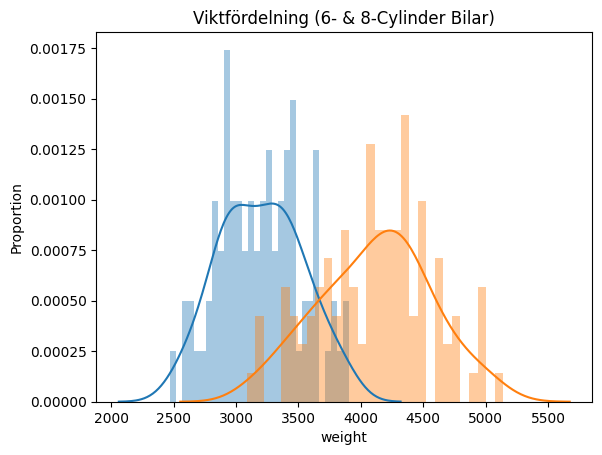

In [6]:
# Histogram som även inkluderar fördelningen
# Skapar första fördelningen
ax = sns.distplot(df6['weight'], bins=30)

# Fixar x, y och huvudtitel
ax.set(xlabel="Vikt", ylabel="Proportion", title="Viktfördelning (6- & 8-Cylinder Bilar)")
# Skapar andra fördelningen
sns.distplot(df8['weight'], bins=30)

C:\Users\Danne\AppData\Local\Temp\ipykernel_3912\3326539263.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax = sns.distplot(df6['mpg'], bins=30, color="blue")
C:\Users\Danne\AppData\Local\Temp\ipykernel_3912\3326539263.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df8['mpg'], bins=30, color="oran

[Text(0.5, 0, 'MPG'),
 Text(0, 0.5, 'Proportion'),
 Text(0.5, 1.0, 'Bränsleförbruk (6- & 8-Cylinder Bilar)')]

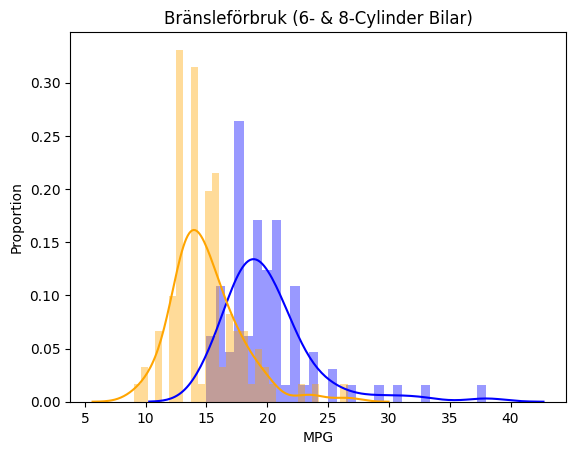

In [7]:
# Samma som ovan
ax = sns.distplot(df6['mpg'], bins=30, color="blue")
sns.distplot(df8['mpg'], bins=30, color="orange")
ax.set(xlabel="MPG", ylabel="Proportion", title="Bränsleförbruk (6- & 8-Cylinder Bilar)")

### Konfidensintervall för medelvärdet av bilarnas vikter (både 6 och 8 cylinder)

In [8]:
# Kollar medelvärdet, medianen och standardavvikelsen på båda cylindertyper
# Beräknar även n-värdet för stickprov (för konfidensintervall)
df6_mean_weight = df6["weight"].mean() # 3198 mean / 3201 median
df8_mean_weight = df8["weight"].mean() # 4114 mean / 4140 median

# Standardavvikelsen - funktion
df6_std = df6["weight"].std() # 332
df8_std = df8["weight"].std() # 448

# Räknar ut vårat n för båda df
df6_n = len(df6) # 84
df8_n = len(df8) # 103

KI_alpha = 0.05 # Använder 95% KI så att intervallerna blir alldeles för stora
t_crit_df6 = t.ppf(1-KI_alpha/2, df6_n-1)
t_crit_df8 = t.ppf(1-KI_alpha/2, df8_n-1)

# Eftersom vi räknar ut KI när sigma är känt gör vi följande:
#
sem_df6 = df6_std/np.sqrt(df6_n)
sem_df8 = df8_std/np.sqrt(df8_n)

lower_df6 = df6_mean_weight - t_crit_df6 * sem_df6
lower_df8 = df8_mean_weight - t_crit_df8 * sem_df8

upper_df6 = df6_mean_weight + t_crit_df6 * sem_df6
upper_df8 = df8_mean_weight + t_crit_df8 * sem_df8

upper_df6 = str(round(upper_df6, 1))
upper_df8 = str(round(upper_df8, 1))
lower_df6 = str(round(lower_df6, 1))
lower_df8 = str(round(lower_df8, 1)) # Avrundning till 1 decimal

In [9]:
print(f"Medelvikten för 6-cylindriga bilar med en 95% KI: {lower_df6} - {upper_df6}")
print(f"Medelvikten för 8-cylindriga bilar med en 95% KI: {lower_df8} - {upper_df8}")

Medelvikten för 6-cylindriga bilar med en 95% KI: 3126.1 - 3270.3
Medelvikten för 8-cylindriga bilar med en 95% KI: 4027.0 - 4202.4


### MPG

In [10]:
df6_mean_mpg = df6["mpg"].mean() # 20 mean / 19 median
df8_mean_mpg = df8["mpg"].mean() # 15 mean / 14 median
df6_std_mpg = df6["mpg"].std() # 3.81
df8_std_mpg = df8["mpg"].std() # 2.83

lower_df6_mpg = df6_mean_mpg - t_crit_df6 * sem_df6
lower_df8_mpg = df8_mean_weight - t_crit_df8 * sem_df8

upper_df6_mpg = df6_mean_mpg + t_crit_df6 * sem_df6
upper_df8_mpg = df8_mean_weight + t_crit_df8 * sem_df8

upper_df6_mpg = str(round(upper_df6_mpg, 1))
upper_df8_mpg = str(round(upper_df8_mpg, 1))
lower_df6_mpg = str(round(lower_df6_mpg, 1))
lower_df8_mpg = str(round(lower_df8_mpg, 1))

sem_df6_mpg = scs.sem(df6["mpg"])
sem_df8_mpg = scs.sem(df8["mpg"])

### Konfidensintervall för mpg på både 6- och 8-cylindriga motorer.

In [11]:
# Intervallfunktion (simplare sätt att räkna ut)
lower_df6_mpg, upper_df6_mpg = t.interval(
    confidence=1 - KI_alpha, df=df6_n - 1, loc=df6_mean_mpg, scale=sem_df6_mpg
)
print(
    f"Medelvärdet på mpg för 6-cylindriga bilar med en 95% KI: {str(round(lower_df6_mpg, 1))}-{str(round(upper_df6_mpg, 1))}"
)

# Samma som ovan
lower_df8_mpg, upper_df8_mpg = t.interval(
    confidence=1 - KI_alpha, df=df8_n - 1, loc=df8_mean_mpg, scale=sem_df6_mpg
)
print(
    f"Medelvärdet på mpg för 8-cylindriga bilar med en 95% KI: {str(round(lower_df8_mpg, 1))}-{str(round(upper_df8_mpg, 1))}"
)


Medelvärdet på mpg för 6-cylindriga bilar med en 95% KI: 19.2-20.8
Medelvärdet på mpg för 8-cylindriga bilar med en 95% KI: 14.1-15.8


# Proportioner för både mpg och viktskillnad

In [12]:
# Konfidensintervallen för mpg, tar medelvärdet från intervallet
average_df6_mpg = (lower_df6_mpg + upper_df6_mpg) / 2
average_df8_mpg = (lower_df8_mpg + upper_df8_mpg) / 2
 
# Jämför proportionen mellan 8-cylinder & 6-cylinder
mpg_prop = average_df8_mpg/average_df6_mpg
mpg_prop = float(round(mpg_prop, 3))

# Samma som ovan fast med vikt (behövde ändra om till float värden)
average_df6_weight = (float(lower_df6) + float(upper_df6)) / 2
average_df8_weight = (float(lower_df8) + float(upper_df8)) / 2

weight_prop = average_df6_weight/average_df8_weight
weight_prop = float(round(weight_prop, 3))

print(f"Skillnad proportionerligt i mpg (8-cylindrig lägre): {mpg_prop}")
print(f"Skillnad proportionerligt i vikt (6-cylindrig lägre): {weight_prop}")

Skillnad proportionerligt i mpg (8-cylindrig lägre): 0.749
Skillnad proportionerligt i vikt (6-cylindrig lägre): 0.777


# Hypotestest
### Accerlation varians större för 8-cylinder jämfört med 6-cylinder

$H_A: \sigma^2_{8-cylinder} > \sigma^2_{6-cylinder}$

$H_0: \sigma^2_{8-cylinder} \leq \sigma^2_{6-cylinder}$

In [13]:
# Plockar ut endast accerelationskolumnen från dataseten
df6_accerlation = df6["acceleration"]
df8_accerlation = df8["acceleration"]

# Räknar ut vårat n
df6_n_accerlation = df6_accerlation.count()
df8_n_accerlation = df8_accerlation.count()

# T-test uträkning
Ttest = np.var(df8_accerlation, ddof=1) / np.var(df6_accerlation, ddof=1)
print(f"T-test: {Ttest}")

# T-crit uträkning
Tcrit = f.ppf(q=0.05, dfn=df8_n_accerlation-1, dfd=df6_n_accerlation-1)
print(f"T-crit: {Tcrit}")


T-test: 1.2116391311971102
T-crit: 0.7102620404273343


# Korrelation scatterplot med regressionslinje

Det är en negativ korrelation mellan vikt och mpg för 6-cylinder bilar (-0.46)
Det är en negativ korrelation mellan vikt och mpg för 8-cylinder bilar (-0.56)


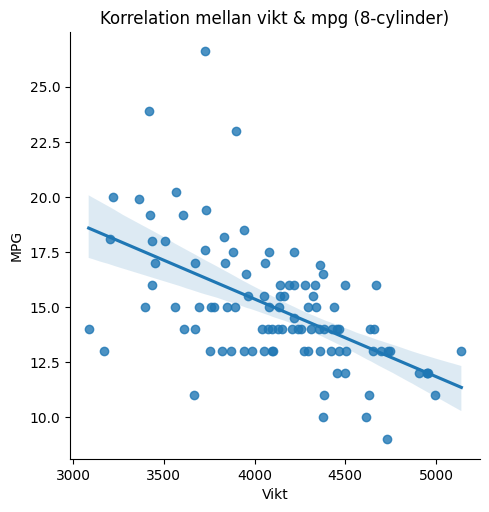

In [14]:

# Funktion som räknar ut korrelationen mellan två parametrar från datasetet
correlation_6 = df6["mpg"].corr(df["weight"])
correlation_8 = df8["mpg"].corr(df["weight"])

# Scatterplot som inkluderar en regressions linje
# Tar två parametrar från datasetet och plottar
sns.lmplot(x='weight', y='mpg', data=df8)
plt.xlabel("Vikt")
plt.ylabel("MPG")
plt.title("Korrelation mellan vikt & mpg (8-cylinder)")
#plt.show()


# if-else funktion skriver ut ifall det är positivt eller negativt beroende på korrelationens summa.
# 6-cylinder bilars korrelation
if correlation_6 > 0:
    print(f"Det är en positiv korrelation mellan vikt och mpg för 6-cylinder bilar ({correlation_6:.2f})")
elif correlation_6 < 0:
    print(f"Det är en negativ korrelation mellan vikt och mpg för 6-cylinder bilar ({correlation_6:.2f})")

# Samma som ovan fast för 8-cylinder bilars korrelation
if correlation_8 > 0:
    print(f"Det är en positiv korrelation mellan vikt och mpg för 8-cylinder bilar ({correlation_8:.2f})")
elif correlation_8 < 0:
    print(f"Det är en negativ korrelation mellan vikt och mpg för 8-cylinder bilar ({correlation_8:.2f})")



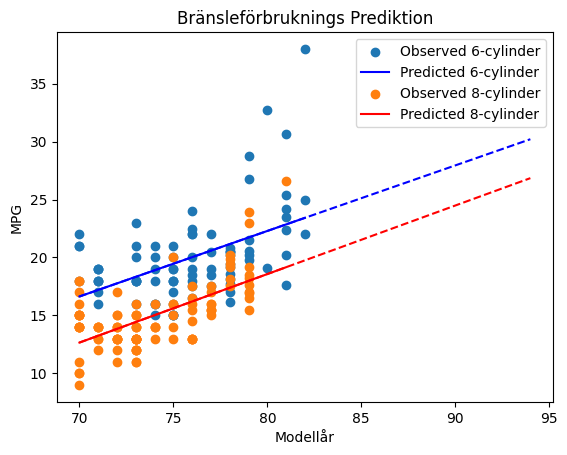

In [15]:

# Filtrear ut antal cylindrar i två olika df
df_6 = df[df["cylinders"] == 6]
df_8 = df[df["cylinders"] == 8]

# Skapar oberoende och beroende variabler
X_6 = df_6["model_year"].values.reshape(-1, 1)
y_6 = df_6["mpg"].values
X_8 = df_8["model_year"].values.reshape(-1, 1)
y_8 = df_8["mpg"].values

# Fit the linear regression models for each group
# Värden som behövs i uträkningen av linjär regression
# regressionslinjen, r-värde, p-värde och standardavvikelsen 
slope_6, intercept_6, r_value_6, p_value_6, std_6 = stats.linregress(X_6.flatten(), y_6)
slope_8, intercept_8, r_value_8, p_value_8, std_8 = stats.linregress(X_8.flatten(), y_8)

# Prediktion av mpg för båda cylindertyperna
predictions_6 = slope_6 * X_6 + intercept_6
predictions_8 = slope_8 * X_8 + intercept_8

# Skapar scatterplot med två separata prediktioner för både typerna av cylindrar
plt.scatter(df_6["model_year"], y_6, label="Observed 6-cylinder")
plt.plot(df_6["model_year"], predictions_6, color="blue", label="Predicted 6-cylinder")
plt.scatter(df_8["model_year"], y_8, label="Observed 8-cylinder")
plt.plot(df_8["model_year"], predictions_8, color="red", label="Predicted 8-cylinder")

# Använder numpy för att utöka plotten och inkludera modelår som inte är med i df
# Räknar ut prediktionen för våra linjer
model_years = np.arange(70, 95).reshape(-1, 1) # Åren som är med i x-axeln
future_predictions_6 = slope_6 * model_years + intercept_6
future_predictions_8 = slope_8 * model_years + intercept_8

# Lägger till en "dotted-line" som visar prediktionen för åren som inte är inkluderade i våra df
plt.plot(model_years, future_predictions_6, color="blue", linestyle="--")
plt.plot(model_years, future_predictions_8, color="red", linestyle="--")
plt.title("Bränsleförbruknings Prediktion")
plt.xlabel("Modellår")
plt.ylabel("MPG")
plt.legend()
plt.show()
